# TASK 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv('task1.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.head()

PDFid       PID                                         title_case  \
0   icdm01-d0  7080AFC1  An efficient data mining technique for discove...   
1  icdm01-d11  7DA9A9A0    Incremental support vector machine construction   
2  icdm01-d16  5956F698  H-mine: hyper-structure mining of frequent pat...   
3  icdm01-d17  7A49F252  -Surface and Its Application to Mining Protein...   
4  icdm01-d18  815AC65F     Neural analysis of mobile radio access network   

   year  conf       CID                                           Keywords  \
0  2001  icdm  468A7487  ['data mining', 'computer science', 'high leve...   
1  2001  icdm  468A7487  ['learning artificial intelligence', 'solids',...   
2  2001  icdm  468A7487  ['data mining', 'very large database', 'cluste...   
3  2001  icdm  468A7487           ['level of detail', 'three dimensional']   
4  2001  icdm  468A7487  ['clustering algorithms', 'radio access networ...   

           AIDs                     AUTs  \
0  ['8173F591']         ['showjane yen']   
1  ['02B8FE08']  ['carlotta domeniconi']   
2  ['7EBD3AAB']             ['jian pei']   
3  ['7F9BE870']           ['xiong wang']   
4  ['7C4E857C']         ['kimmo raivio']   

                                                Text  
0  An Efficient Data Mining Technique for Discove...  
1  Incremental Support Vector Machine Constructio...  
2  H Mine : Hyper Structure Mining of Frequent Pa...  
3  Surface and Its Application to Mining Protein ...  
4  Neural Analysis of Mobile Radio Access Network...

## "matrix" experts - authors published at least 3 papers AND used "matrix" most frequently

#### keyword counts

In [91]:
keyword_counts = {}
for items in df.Keywords:
    try:
        items = items.replace('[', '').replace(']', '').replace("'", '').split(',')
    except:
        continue
    for item in items:
        if item.strip() not in keyword_counts:
            keyword_counts[item.strip()] = 1
        else:
            keyword_counts[item.strip()] += 1

In [95]:
sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

[('data mining', 661),
 ('search engine', 314),
 ('social network', 292),
 ('web pages', 260),
 ('machine learning', 220),
 ('semantic web', 184),
 ('social networks', 180),
 ('social media', 163),
 ('information retrieval', 160),
 ('clustering', 142),
 ('algorithms', 141),
 ('indexation', 136),
 ('classification', 120),
 ('learning artificial intelligence', 119),
 ('web service', 108),
 ('satisfiability', 104),
 ('recommender system', 104),
 ('time series', 96),
 ('collaborative filtering', 95),
 ('text mining', 90),
 ('information extraction', 90),
 ('recommender systems', 87),
 ('world wide web', 85),
 ('web search engine', 80),
 ('support vector machine', 79),
 ('feature selection', 78),
 ('real time', 76),
 ('data analysis', 71),
 ('web mining', 71),
 ('xml', 66),
 ('probabilistic model', 66),
 ('performance', 65),
 ('association rule', 63),
 ('personalization', 63),
 ('decision tree', 61),
 ('design', 60),
 ('computer science', 59),
 ('wikipedia', 58),
 ('text analysis', 57),
 ('

In [33]:
text = df.Text.head().values[0]

In [38]:
import string

In [57]:
filtered_words = [word for word in word_tokenize(text) 
                  if word.lower() not in set(stopwords.words('english')) 
                  | set(string.punctuation) and len(word) > 1]

In [58]:
len(word_tokenize(text)), len(filtered_words)

(2157, 921)

In [59]:
filtered_words = pd.Series(filtered_words)

In [60]:
filtered_words.value_counts()

sequence         58
bit              33
frequent         32
sequences        30
candidate        29
database         26
string           23
D1               16
generate         15
sequential       14
m+n+1            14
itemsets         13
itemset          12
generated        11
record           10
customer         10
h+1              10
contained        10
Mining            9
patterns          9
mining            9
two               9
s2                8
data              8
s1                8
find              7
Step              7
m+n               6
Data              6
operation         6
                 ..
customers         1
unique            1
counting          1
Abstract          1
sj+1              1
step              1
Science           1
2sequences        1
n≥1               1
replace           1
Computer          1
Extending         1
Find              1
discover          1
k≥1               1
ordered           1
Workshop          1
numbers           1
1,2               1


* dispersion plots
* lemmatizing

In [61]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemma_text = pd.Series(list(map(lambda x: lemmatizer.lemmatize(x), filtered_words)))


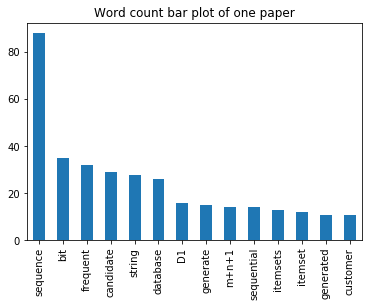

In [63]:
lemma_text.value_counts()[lemma_text.value_counts() > 10].plot(kind='bar')
plt.title('Word count bar plot of one paper')

## Bigrams

In [67]:
print(text)

An Efficient Data Mining Technique for Discovering Interesting Sequential Patterns
Show Jane Yen* and Yue Shi Lee**
*Dept . of Computer Science and Information Engineering , Fu Jen Catholic University , Taipei , TAIWAN , ROC
**Dept . of Information Management , Ming Chuan University , Taipei , TAIWAN , ROC
Email : sjyen@csiefjuedutw , leeys@mcuedutw
Abstract
Mining sequential patterns is to discover sequential purchasing behaviors of most customers from a large amount of customer transactions . In this paper , a data mining language is presented . From the data mining language , users can specify the interested items and the criteria of the sequential patterns to be discovered . Also , an efficient data mining technique is proposed to extract the sequential patterns according to the users` requests .
1 Data mining language
The definitions about mining sequential patterns are presented in [ 1,2 ] . Our data mining language , which refers to [ 3 ] , is defined as follows :
Mining <Sequen

In [71]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(text))
finder.nbest(bigram_measures.pmi, 20)  # doctest: +NORMALIZE_WHITESPACE


[('11', 'Scan'),
 ('664', '669'),
 ('ALP', 'Chen'),
 ('Association', 'Rules'),
 ('Computer', 'Science'),
 ('Expert', 'Systems'),
 ('Fu', 'Jen'),
 ('Jen', 'Catholic'),
 ('Lee**', '*Dept'),
 ('Ming', 'Chuan'),
 ('Performance', 'Improvements'),
 ('Shi', 'Lee**'),
 ('Systems', 'Applications'),
 ('Yue', 'Shi'),
 ('definitions', 'about'),
 ('large', 'amount'),
 ('mcuedutw', 'Abstract'),
 ('more', 'than'),
 ('most', 'customers'),
 ('than', 'one')]

In [72]:
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)  # doctest: +NORMALIZE_WHITESPACE

[('2001', 'IEEE'),
 ('Sequential', 'Patterns'),
 ("Int'l", 'Conference'),
 ('With', 'clause'),
 ('*', '”'),
 ('as', 'follows'),
 ('described', 'as'),
 ('notation', '“'),
 ('“', '*'),
 ('”', 'Proc')]